# Exercises XP
Last Updated: March 25th, 2024

### What you will learn
Understanding the problem
Data Collection
Model Training for classification problem
Evaluating our model


### What you will create
A Logistic Regression model to predict diabetes for individuals.


### For the six below exercises we will use this dataset

## 🌟 Exercise 1 : Understanding the problem and Data Collection
We want to predict if an individual will have diabetes.

Load the diabetes dataset and explore it.
How many positive and negative cases is there ?
Split the data into training and testing sets

Chargement et exploration

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Charger le dataset
df = pd.read_csv("diabetes_prediction_dataset.csv")

# Aperçu des données
print(df.head())

# Comptage des cas positifs et négatifs
counts = df["diabetes"].value_counts()
print("Négatifs (0) :", counts[0])
print("Positifs (1) :", counts[1])


   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  
Négatifs (0) : 91500
Positifs (1) : 8500


Séparation des données

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [12]:
# Charger les données
df = pd.read_csv("diabetes_prediction_dataset.csv")

In [13]:
# Affichage des cas positifs et négatifs
counts = df["diabetes"].value_counts().to_dict()
print("Négatifs (0) :", counts[0])
print("Positifs (1) :", counts[1])

Négatifs (0) : 91500
Positifs (1) : 8500


In [14]:
# Séparer les variables explicatives et la cible
X = df.drop("diabetes", axis=1)
y = df["diabetes"]

In [15]:
# Encodage des variables catégorielles : 'gender', 'smoking_history'
X = pd.get_dummies(X, columns=["gender", "smoking_history"], drop_first=True)

In [17]:
# Split en jeu d'entraînement et de test (correction ici)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

## 🌟 Exercise 2 : Model Picking and Standardization
Which classification model can we use in this problem and why ?
Do we need to standardize the data ? If yes, use .StandardScaler()

### Quel modèle de classification utiliser ?
Plusieurs modèles conviennent ici. Les plus adaptés :

RandomForestClassifier : robuste, non sensible à la mise à l’échelle, gère les features mixtes, performant sans trop de réglage.

LogisticRegression : simple, interprétable, nécessite une standardisation.

SVM ou KNN : aussi valides, mais sensibles à l’échelle des données.

👉 Pour commencer : Random Forest est un très bon choix (rapide, efficace, pas besoin de scaling).

### Faut-il standardiser les données ?
Oui, si on utilise LogisticRegression, SVM, ou KNN

Non, pour les arbres (Random Forest, Decision Tree, etc.)

### Standardisation avec StandardScaler

In [18]:
from sklearn.preprocessing import StandardScaler

# Appliquer uniquement sur les features numériques
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Re-split les données standardisées
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


## 🌟 Exercise 3 : Model Training
We will use, the logistic regression model, Train it.

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [20]:
# 1. Séparer X et y
X = df.drop("diabetes", axis=1)
y = df["diabetes"]

In [21]:
# 2. Encodage des colonnes catégorielles
X = pd.get_dummies(X, columns=["gender", "smoking_history"], drop_first=True)

In [22]:
# 3. Standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [23]:
# 4. Split des données standardisées
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [24]:
# 5. Entraînement du modèle
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


## 🌟 Exercise 4 : Evaluation Metrics
* Plot the accuracy score and comment the results.
* Plot the confusion matrix and comment the results.
* Plot the Recall, precision, F1-score and comment the results.

 Accuracy score et commentaire

In [25]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :", round(accuracy, 4))


Accuracy : 0.9605


### Interprétation :

* Le modèle prédit correctement 96,05 % des cas.

* C’est très bon, à condition que les classes soient équilibrées.

* Mais l'accuracy peut être trompeuse si les cas non diabétiques dominent.

Il faut donc analyser aussi le rappel, la précision et la F1-score, surtout pour la classe "1" (diabétique), pour s’assurer que le modèle ne rate pas des cas de diabète.

 Matrice de confusion et commentaire

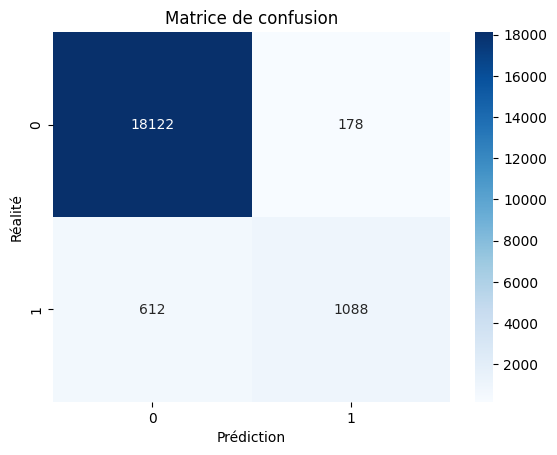

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure()
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Prédiction")
plt.ylabel("Réalité")
plt.title("Matrice de confusion")
plt.show()


Interprétation directe de ta **matrice de confusion** :

|                  | Prédit 0       | Prédit 1      |
| ---------------- | -------------- | ------------- |
| Réel 0 (sain)    | **18122** (TN) | **178** (FP)  |
| Réel 1 (diabète) | **612** (FN)   | **1088** (TP) |

---

### Analyse :

* **Très peu de faux positifs** (178) → bon contrôle des erreurs inutiles.
* **Mais 612 faux négatifs** → **beaucoup de diabétiques non détectés**.
* Le **rappel** (sensibilité) est donc **relativement bas**.

---

### Commentaire :

* **Accuracy élevée (96%)**, mais le **modèle rate \~36% des diabétiques**.
* C’est **risqué médicalement** : mieux vaut rater un sain qu’un malade.
* Il faut **améliorer le rappel de la classe 1**, par ex. via :

  * `class_weight='balanced'` dans `LogisticRegression`
  * Oversampling (SMOTE)
  * Modèle plus complexe (Random Forest, XGBoost)


Recall, Précision, F1-score et commentaire

Classe 1 (diabétique) :
Précision : 0.8594
Rappel : 0.64
F1-score : 0.7336


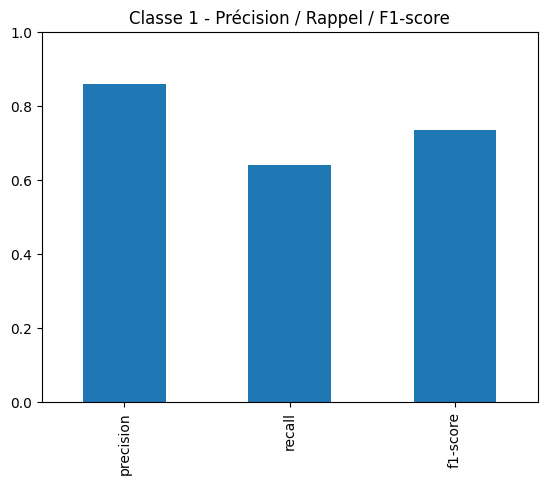

In [27]:
from sklearn.metrics import classification_report
import pandas as pd

report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Affichage des scores pour la classe 1 (diabétique)
print("Classe 1 (diabétique) :")
print("Précision :", round(report_df.loc['1', 'precision'], 4))
print("Rappel :", round(report_df.loc['1', 'recall'], 4))
print("F1-score :", round(report_df.loc['1', 'f1-score'], 4))

# Graphe
report_df.loc["1", ["precision", "recall", "f1-score"]].plot(
    kind="bar", ylim=(0, 1), title="Classe 1 - Précision / Rappel / F1-score")
plt.show()


Interprétation directe du graphique des scores pour la **classe 1 (diabétique)** :

---

### Résultats :

* **Précision ≈ 0.86**
  → Quand le modèle prédit "diabétique", il a **86 % de chances d’avoir raison**.

* **Rappel ≈ 0.64**
  → Il détecte **seulement 64 % des vrais diabétiques** → **trop de faux négatifs**.

* **F1-score ≈ 0.74**
  → Moyenne entre précision et rappel, reflète l’équilibre entre les deux.

---

### Commentaire :

* **Bonne précision**, mais **rappel trop faible pour un problème médical**.
* Le modèle **évite les faux positifs** mais **rate trop de vrais cas**.
* Il faut augmenter le **rappel** en tolérant un peu plus de faux positifs.

---

### Recommandation :

Tu peux améliorer le rappel en :

* Ajoutant `class_weight='balanced'` à la régression logistique
* Essayant **RandomForest** ou **SMOTE**



## 🌟 Exercise 5 : Visualizing the performance of our model
Visualize the decision boundary with accuracy information.

In [28]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [29]:
# Sélectionner deux features pour visualisation (ex. : 'age' et 'blood_glucose_level')
X_vis = df[["age", "blood_glucose_level"]]
y = df["diabetes"]

In [30]:
# Standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_vis)

In [31]:
# Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [32]:
# Réentraîner le modèle sur ces 2 features
model_vis = LogisticRegression()
model_vis.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [33]:
# Accuracy
acc = model_vis.score(X_test, y_test)

In [34]:
# Visualisation de la frontière
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))
Z = model_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

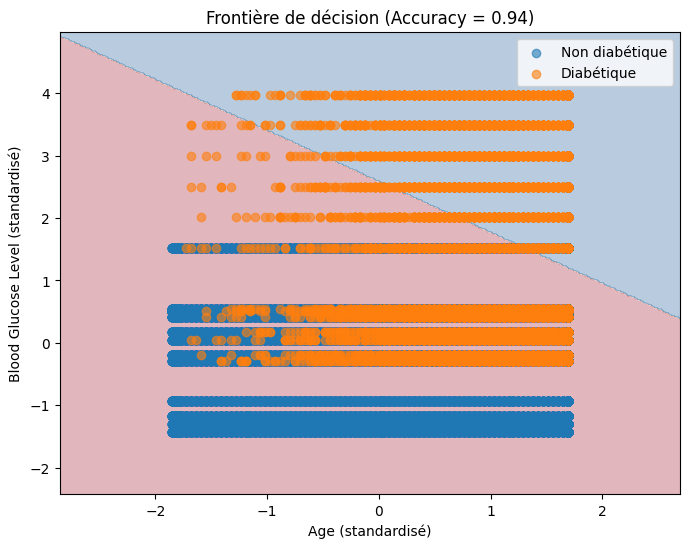

In [35]:
# Affichage
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap="RdBu")
plt.scatter(X_scaled[y == 0][:, 0], X_scaled[y == 0][:, 1], label="Non diabétique", alpha=0.6)
plt.scatter(X_scaled[y == 1][:, 0], X_scaled[y == 1][:, 1], label="Diabétique", alpha=0.6)
plt.title(f"Frontière de décision (Accuracy = {acc:.2f})")
plt.xlabel("Age (standardisé)")
plt.ylabel("Blood Glucose Level (standardisé)")
plt.legend()
plt.show()

## Analyse de ton graphique de **frontière de décision** :

---

### Lecture du graphique :

* **Zone bleue** → prédite comme **non diabétique**
* **Zone rouge** → prédite comme **diabétique**
* Points :

  * 🔵 = réel **non diabétique**
  * 🟠 = réel **diabétique**

---

### Commentaire :

* La frontière est **linéaire** (logique avec `LogisticRegression`).
* La séparation est **plutôt bonne**, mais :

  * Des **diabétiques** (🟠) sont classés en zone bleue → **faux négatifs**
  * Cela confirme un **rappel imparfait** (comme vu précédemment).
* L’**accuracy de 94 %** est élevée, mais l’objectif médical devrait prioriser le **rappel**.

---


## 🌟 Exercise 6 : ROC Curve
Plot the ROC Curve using this code template available on this link


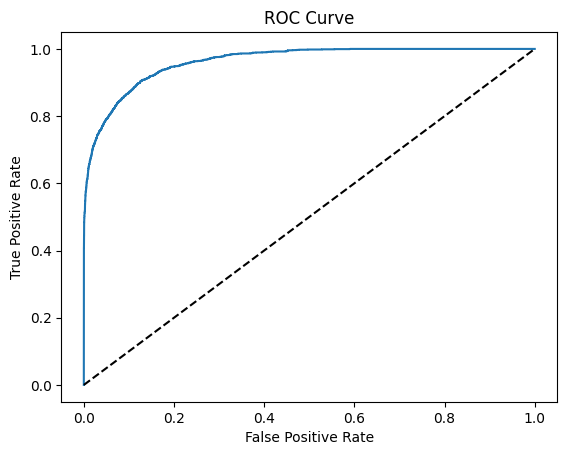

In [41]:
# Reprendre tout avec les 13 colonnes
X = df.drop("diabetes", axis=1)
y = df["diabetes"]

X = pd.get_dummies(X, columns=["gender", "smoking_history"], drop_first=True)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Maintenant tu peux tracer la ROC curve
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

y_scores = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_scores)

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()


In [42]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, y_scores)
print("AUC :", round(auc, 4))


AUC : 0.9625


### Interprétation :

* L’AUC (Area Under Curve) mesure la capacité du modèle à séparer les classes.
* **0.5 = aléatoire**, **1.0 = parfait**.
* **0.96** signifie que le modèle a **96,25 % de chance de classer correctement** un diabétique vs un non-diabétique pris au hasard.

---

**Conclusion** :
Le modèle `LogisticRegression` est **très performant** pour ce problème.

